<a href="https://colab.research.google.com/github/SivanKaNa/DL_046211_hw3/blob/master/ece046211_hw3_seq_tasks_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Student 1| student_1@campus.technion.ac.il| 123456789|
|Student 2| student_2@campus.technion.ac.il| 987654321|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw3_id1_id2.zip` with content:
        * `ece046211_hw3_id1_id2.ipynb` - the code tasks
        * `ece046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Dropout](#-Question-1--Dropout)
    * [Q2 - Preventing Variance Explosion](#-Question-2--Preventing-Variance-Explosion)
    * [Q3 - Batch Normalization](#-Solution-4--Batch-Normalization)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Dropout
---
In this question, we are going to analyze the following idea:

**Idea: use Droput regularization as a feature selection mechanism for the input.**

To implement the idea, we wish to create a Dropout mask with probability $p_i$ to drop (=zero out) the $i^{th}$ component of the input feature vector, and optimize $p_i$ such that it encourages a deterministic selction of features (i.e., $p_i \to 0 \text{ or } 1$).

We will analyze the method on the simple case of Linear Regression: $$ \mathcal{L}(w)=\frac{1}{2}\sum_{n=1}^N\left(y^{(n)} -w^TD^{(n)}x^{(n)} \right)^2, $$ where $w \in \mathbb{R}^d$ is the parameters vector, $x^{(n)}\in \mathbb{R}^d$ are the trainin set samples, $y^{(n)} \in \mathbb{R}$ are the corresponding labels and $D^{(n)}\in \{0, 1 \}^{d \times d}$ is the *diagonal* random Dropout mask, where each element is sampled independently according to:
$$ D_{ii}^{(n)}=\frac{1}{1-p_i}\begin{cases} 1 \text{ w.p. } 1-p_i \\ 0 \text{ w.p. } p_i \end{cases} ,$$
where $p_i \in [0,1]$ is the probability to drop (=zero out) the $i^{th}$ component in the input vector, and we denote $p=[p_1, ..., p_d]^T$.

1. Find $\mathbb{E}[D_{ii}^{(n)}]$ and show that $\mathbb{E}[D_{ii}^{(n)}D_{jj}^{(n)}]=1 + \delta_{ij}\frac{p_i}{1-p_i}$.

2. Show that the mean cost function $\bar{\mathcal{L}}(w,p)$ (the mean is over the *masks*) is $$ \bar{\mathcal{L}}(w,p) = \mathbb{E}[\mathcal{L}] =\frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{i=1}^d \frac{p_i}{1-p_i}c_iw_i^2, $$ where $c_i = \sum_{n=1}^N \left(x_i^{(n)} \right)^2$. From this section onwards, you can always assume $\forall i : c_i >0$.

3. Briefly explain what is the difference between $\bar{\mathcal{L}}(w,p)$ and the standard Linear Regression loss function without Dropout.

4. Note that $\bar{\mathcal{L}}(w,p)$ is dependent on $p$, but we know that $p_i \in [0,1]$. Suggest a function $p=f(u)$ such that we can use Gradient Descent without cinstraints on $\bar{\mathcal{L}}(w,f(u))$.

5. Recall that we want $p_i \to 1$ for some features and for the rest $p_i \to 0$. Assume that there exists a *sparse* solution $w_0$ (that includes zeros), and a *dense* (non-sparse) solution $w_*$ such that $$ \forall n : y^{(n)} = w_0^Tx^{(n)}=w_*^Tx^{(n)}.$$ Does that necessarily mean that we get $w_0$ by reaching the minimum of $\bar{\mathcal{L}}(w,p)$ at $w,p$?

6. After some experiments, we got an improvement by adding noise to the input and regularization on $p$, and got $$ \bar{\mathcal{L}}(w,p) = \mathbb{E}[\mathcal{L}] =\frac{1}{2}\sum_{n=1}^N \left(y^{(n)} - w^Tx^{(n)} \right)^2 + \frac{1}{2}\sum_{i=1}^d \frac{1}{1-p_i}w_i^2\sum_{n=1}^N\left(x_i^{(n)}\right)^2 + \mu\sum_{i=1}^d(1-p_i). $$ Show by calculating $\bar{\mathcal{L}}(w)=\min_{p\in \mathbb{R}^d}\bar{\mathcal{L}}(w,p)$ that we can omit the Dropout and instead add a regularization $R(w)$ directly to the Linear Regression. Calculate the regularization $R(w)$ and explain how it helps in feature selection.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Preventing Variance Explosion
---
This question relates to lectures 8-9 (from slide 7):

Find an initializtion scheme such that $$ \forall l, i,: \text{(1) } \mathbb{E}\left[F_l(u_l)|u_l\right]=0, \text{ (2) } Var(u_l[i]) = 1, $$ assuming skip connections: $u_{l+1} = u_l + F_l(u_l)$ with a single skip $F_l(u_l)=W_l\phi(u_l)+b_l$ and the activation is ReLU: $\phi(x) = \text{ReLU}(x) = \max(0,x)$.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 -Batch Normalization
---
This question relates to lectures 8-9 (from slide 9):

Prove that **without** regularization, BatchNorm **scale invariance** for parameters $\mathbf{w}$ implies:
1. $\nabla \mathcal{L}(\mathbf{w})^T\mathbf{w} = 0$
2. And under gradient flow dynamics ($\dot{\mathbf{w}} = -\eta \nabla \mathcal{L}(\mathbf{w})$) this implies (L2) norm conservation: $\forall t: ||\mathbf{w}(t)||^2 = C$

Hint: see results from the multilayer networks lecture.

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [1]:
# this part uses the Wikitext-2 dataset. To access torchtext datasets, please install `torchdata`:
# `pip install torchdata` ir `conda install -c pytorch torchdata` in activated environment
# or `!pip install torchdata` on colab.
!pip install torchdata
# notes:
# torch=2.0.0 <-> torchtext 0.15.1
# torch=1.13.0 <-> torchtext 0.14.0
# torch=1.12.1 <-> torchtext 0.13.1
# downgrading torchtext example: !pip install torchtext==0.13.1 --no-deps
# torchtext requires the `portalocker` package to download datasets:
!pip install portalocker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from typing import Tuple

# pytorch
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

# torchtext
import torchtext
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
print(f'pytorch: {torch.__version__}, torchtext: {torchtext.__version__}')

pytorch: 2.0.1+cu118, torchtext: 0.15.2+cpu


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Run the following cells that define the functions `batchify` and `data_process` and initialize the tokenizer, vocabulary and the WikiText2 train dataset.
2. Create the train, valid and test data using the provided `batchify` function.
5. Print the shape of `train_data`, write in a comment the meaning of each dimension (e.g. `# [meaning of dim1, meaning of dim2]`).
6. Print the first 20 words of one training sample from `train_data`. Use the vocabulary you built to transfer between tokens to words: `itos = vocab.vocab.get_itos()` will give a "int to string" list.

In [4]:
def batchify(data, bsz):
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

In [5]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

In [6]:
train_iter = WikiText2(split='train')
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [7]:
# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter, val_iter, test_iter = WikiText2()
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
batch_size = 20
eval_batch_size = 10

In [9]:
"""
Your Code Here
"""
train_data = batchify(train_data, batch_size)
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)

In [10]:
# [meaning of dim1: number of data batches, meaning of dim2: each data batch size]
train_data.size()

torch.Size([102499, 20])

In [11]:
itos = vocab.vocab.get_itos()

In [12]:
# Assuming you have train_data and itos available
train_sample = train_data[0]  # Get the first training sample

# Print the first 20 words using the vocabulary (since batch size is 20, it's the same as peinting the first train sample)
first_20_words = [itos[token_id] for token_id in train_sample]
print(first_20_words)

['=', 'all', 'party', 'major', 'modern', 'polygamist', ',', 'present', 'arrangement', 'trying', '<unk>', 'military', 'offering', 'the', 'and', 'or', 'while', 'escaping', 'receive', 'the']


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a nice" as input, and "have a nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Example: for `bptt=2`, and the ABCDEFG... characters as input, our batches will be in the form of: `data=[a, b], target=[b, c]`. For `bptt=3`: `data=[a, b, c], target=[b, c, d]` and so on. This one example is a batch.
    * Print a sample from `data` and `target`.

In [13]:
"""
Your Code Here
"""
def get_batch(source, i, bptt):
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int
        bptt: int
    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[i + 1 : i + seq_len +1].reshape(-1)

    return data, target

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam, RAdam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)` or any scheduler of your choosing.
    * Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`).
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [14]:




class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, norm_first=False):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout, norm_first=norm_first)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [30]:
"""
Your Code Here
"""

# Hyperparameters
embedding_size = 224  # Choose from [200, 250]
hidden_units = 225  # Choose from [200, 250]
num_layers = 4  # Choose from [2, 4]
num_attention_heads = 4  # Choose from [2, 4]
dropout = 0.1  # Choose from [0.0, 0.3]

# Loss criterion
loss_criterion = nn.CrossEntropyLoss()

# Transformer LayerNormalization
layer_norm_type = "pre"  # Choose from ["pre", "post"]
if layer_norm_type == "pre":
    norm_first = True
elif layer_norm_type == "post":
    norm_first = False

num_tokens = len(vocab)

model = TransformerModel(ntoken=num_tokens,
                         ninp=embedding_size,
                         nhead=num_attention_heads,
                         nhid=hidden_units,
                         nlayers=num_layers,
                         dropout=dropout,
                         norm_first=norm_first)

# Optimizer
optimizer_choice = "RAdam"  # Choose from ["SGD", "Adam", "RAdam"]
if optimizer_choice == "SGD":
    optimizer = torch.optim.SGD
elif optimizer_choice == "Adam":
    optimizer = torch.optim.Adam
elif optimizer_choice == "RAdam":
    optimizer = torch.optim.RAdam

learning_rate = 1e-2  # Choose from [5e-3, 5.0]
optimizer = optimizer(model.parameters(), lr=learning_rate)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 3.0, gamma=0.8, verbose=True)  # You can choose a different scheduler if desired

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


print('number of tokens: ', num_tokens)

print('all hyper parameters:', )
hp_dict = {'embedding_size': embedding_size,
            'hidden_units': hidden_units,
            'num_layers': num_layers,
            'num_attention_heads': num_attention_heads,
            'dropout': dropout,
            'loss_criterion': loss_criterion,
            'optimizer': optimizer,
            'learning_rate': learning_rate,
            'scheduler': scheduler,
            'norm_first': norm_first}
for key, value in hp_dict.items():
    print(key, value)

print('model:\n\n', model)


Adjusting learning rate of group 0 to 1.0000e-02.
number of tokens:  28782
all hyper parameters:
embedding_size 224
hidden_units 225
num_layers 4
num_attention_heads 4
dropout 0.1
loss_criterion CrossEntropyLoss()
optimizer SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
learning_rate 0.01
scheduler <torch.optim.lr_scheduler.StepLR object at 0x7f8e026c5ed0>
norm_first True
model:

 TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=224, out_features=224, bias=True)
        )
        (linear1): Linear(in_features=224, out_features=225, bias=True)
        (dropout): Dropout

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [31]:
def evaluate(model, eval_data, ntokens, criterion):
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i, bptt)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

In [32]:
"""
Your Code Here
"""
def train(model, bptt, ntokens, criterion):
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i, bptt)
        seq_len = data.size(0)
        if seq_len != bptt:  # only on last batch
            src_mask = src_mask[:seq_len, :seq_len]

        output = model(data, src_mask) # complete
        output_flat = output.view(-1, ntokens)
        loss = criterion(output_flat, targets) # complete

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}|')
            total_loss = 0
            start_time = time.time()

In [ ]:
"""
Your Code Here
"""
import pandas as pd

best_val_loss = float("inf")
epochs = 25 # complete the number of epochs to run
best_model = None
bptt = 35

ntokens =  len(vocab)
criterion = loss_criterion

performance_list = []

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    # complete: call train() here with appropriate paramteters
    train(model, bptt, ntokens, criterion)

    val_loss = evaluate(model, val_data, ntokens, criterion)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        print('updated the best model')
        best_val_loss = val_loss
        best_model = model

    performance_list.append({'epoch_n': epoch, 'train_loss': evaluate(model, train_data, ntokens, criterion),  'val_loss': val_loss, 'valid_ppl': math.exp(val_loss)})

    scheduler.step()


df = pd.DataFrame(performance_list)


test loss:  6.2675820839274925


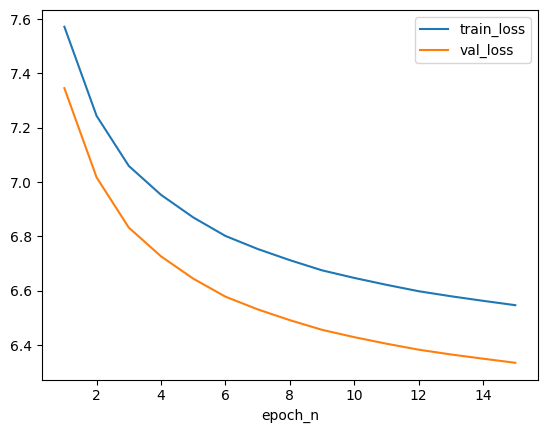

In [42]:
df.plot('epoch_n', ['train_loss', 'val_loss'])
print('test loss: ', evaluate(best_model, test_data, ntokens, criterion))

In [44]:
df.to_csv('config_1_df.csv')
torch.save(best_model.state_dict(), 'config_1_model')

with open('config_1.txt', 'w') as f:
    print('number of tokens: ', num_tokens, file=f)

    print('all hyper parameters:', file=f)
    for key, value in hp_dict.items():
        print(key, value, file=f)

    print('model:\n\n', model, file=f)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [ ]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab)
    itos = vocab.vocab.get_itos()
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = itos[word_idx]
            words.append(word)
    return words

In [ ]:
"""
Yout code Here
"""
import pandas as pd

best_val_loss = float("inf")
epochs = 15 # complete the number of epochs to run
best_model = None
bptt = 35

ntokens =  len(vocab)
criterion = loss_criterion

performance_list = []

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    # complete: call train() here with appropriate paramteters
    train(model, bptt, ntokens, criterion)

    val_loss = evaluate(model, val_data, ntokens, criterion)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        print('updated the best model')
        best_val_loss = val_loss
        best_model = model

    scheduler.step()

    # generate sentences using the model
    sentences = []
    for i in range(3):
      sentences.append(generate(model, vocab, nwords=20))
    print(sentences)

    performance_list.append({'epoch_n': epoch, 'train_loss': evaluate(model, train_data, ntokens, criterion),  'val_loss': val_loss, 'valid_ppl': math.exp(val_loss), 'generated_sentences': sentences})

df_word_generation = pd.DataFrame(performance_list)


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/